In [156]:
!pip install lightgbm catboost xgboost seaborn --quiet

In [157]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import mlflow
from mlflow.models import infer_signature

In [158]:
from sklearn.datasets import fetch_california_housing 
cali = fetch_california_housing()
cali

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [159]:
# Import necessary libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
data = cali
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'], name='MedHouseVal')

In [160]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [161]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [162]:
y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MedHouseVal, Length: 16512, dtype: float64

Mean Squared Error: 0.2435998341534843


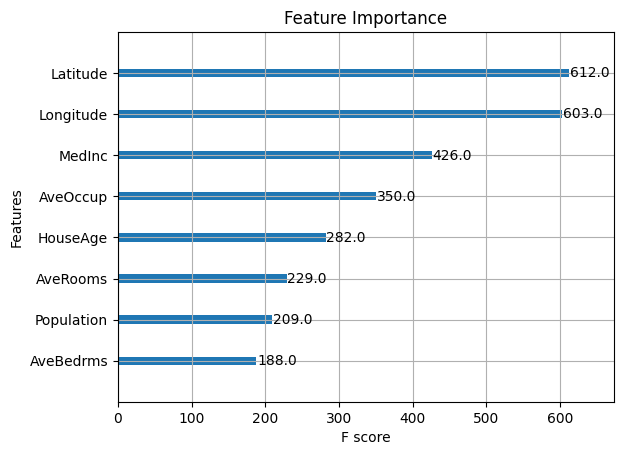

In [163]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot feature importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Deploy the model with Gradio
def predict_house_value(MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude):
    input_data = np.array([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]])
    prediction = model.predict(input_data)
    return prediction[0]

Mean Squared Error: 0.2435998341534843


/var/folders/xz/9d0gd46n5lgfq9x35p2g02sw0000gn/T/ipykernel_95434/413069780.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


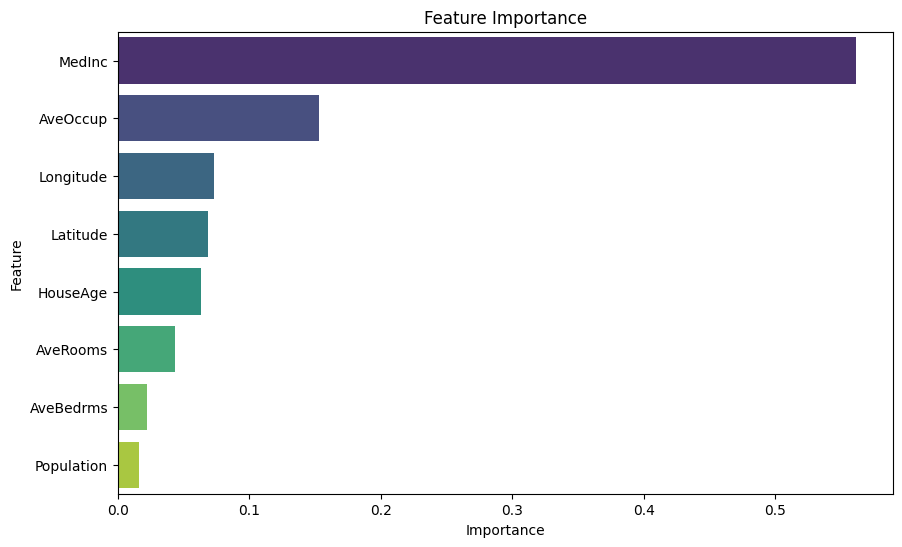

In [164]:
import seaborn as sns
import pandas as pd

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Extract feature importances
feature_importances = model.feature_importances_
features = data['feature_names']

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [165]:
importance_df

,Feature,Importance
0,MedInc,0.561363
5,AveOccup,0.152680
7,Longitude,0.072794
6,Latitude,0.068481
1,HouseAge,0.063370
2,AveRooms,0.043206
3,AveBedrms,0.022318
4,Population,0.015789


In [166]:

# Calculate the mode for each feature in the training data
default_values = X_train.mode().iloc[0].to_dict()

# Create Gradio interface with default values
inputs = [gr.Number(label=feature, value=default_values[feature]) for feature in data['feature_names']]
output = gr.Number(label="Predicted House Value")

gr_interface = gr.Interface(fn=predict_house_value, inputs=inputs, outputs=output, title="California House Value Predictor")
gr_interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7867
Running on public URL: https://7f7dedef8712dc755e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [167]:
# Remove special characters from feature names to be able to use them as keys for mlflow metrics
feature_names = [
    name.replace(" ", "_").replace("(", "").replace(")", "")
    for name in data["feature_names"]
]
X_train, X_test, y_train, y_test = train_test_split(
    data["data"], data["target"], test_size=0.2
)
X_train

array([[   7.5       ,   31.        ,    7.61165049, ...,    2.88834951,
          37.29      , -122.01      ],
       [   1.8636    ,   21.        ,    4.85677749, ...,    2.89769821,
          35.13      , -118.44      ],
       [   2.2121    ,   37.        ,    4.04330709, ...,    4.1023622 ,
          33.88      , -118.25      ],
       ...,
       [   5.1805    ,   36.        ,    5.94513274, ...,    2.69380531,
          33.79      , -118.1       ],
       [   5.399     ,   34.        ,    5.35258359, ...,    2.9331307 ,
          33.83      , -118.34      ],
       [   3.0915    ,   31.        ,    4.81264637, ...,    3.10538642,
          33.11      , -117.07      ]])

In [168]:
# create model instance
lgb_classifier = LGBMClassifier(
    n_estimators=10,
    max_depth=3,
    learning_rate=1,
    objective="binary:logistic",
    random_state=123,
)
lgb_classifier

LGBMClassifier(learning_rate=1, max_depth=3, n_estimators=10,
               objective='binary:logistic', random_state=123)

In [169]:
import mlflow
from mlflow.models import infer_signature
from sklearn import datasets

# prepare data
X, y = datasets.load_wine(as_frame=False, return_X_y=True)
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [170]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])